## Навчальна практика: обчислювальна 2



In [ ]:
import numpy as np
import scipy.linalg as la
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
import torch
from collections import Counter
import pandas as pd
from prettytable import PrettyTable
from scipy.stats import poisson
from termcolor import colored
from IPython.display import display, Math
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
from scipy.stats import triang
import matplotlib.pyplot as plt

## Зміст
- [Завдання 10. Методи побудови оцінок](#2)
     - [Задача 15.13](#2-1)
     - [Задача 15.14](#2-2)
     - [Задача 15.15](#2-3)
     - [Задача 15.16](#2-4)
- [Завдання 12. Перевірка гіпотез про параметри нормального розподілу](#4)
     - [Задача 17.10](#4-1)
     - [Задача 17.11](#4-2)
     - [Задача 17.12](#4-3)
- [Завдання 13. Критерій $\chi^2$](#5)
     - [Задача 18.12](#5-1)
     - [Задача 18.15](#5-2)
     - [Задача 18.18](#5-3)
     - [Задача 18.20](#5-4)
- [Завдання 14. Непараметричні критерії: критерій Колмогорова, критерій Вілкоксона, критерій знаків](#6)
     - [Задача 19.10](#6-1)
     - [Задача 19.11](#6-2)
     - [Задача 19.12](#6-3)

<a name='2'></a>
## Завдання 10. Методи побудови оцінок

<a name='2-1'></a>
### Задача 15.13

Умова задачі

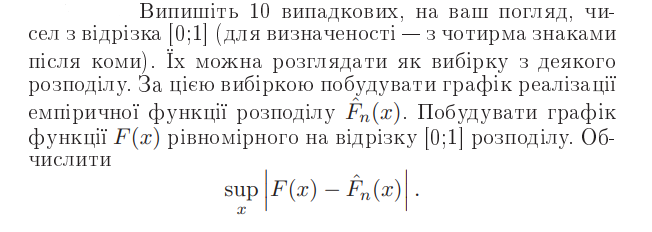

+-----------------+--------+--------+--------+--------+--------+--------+--------+--------+-------+--------+
|    Кількість    |   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8    |   9   |   10   |
+-----------------+--------+--------+--------+--------+--------+--------+--------+--------+-------+--------+
| Випадкові числа | 0.1578 | 0.2073 | 0.3214 | 0.4162 | 0.4729 | 0.5367 | 0.6241 | 0.7235 | 0.812 | 0.9583 |
+-----------------+--------+--------+--------+--------+--------+--------+--------+--------+-------+--------+
Вхідні дані= [0.1578, 0.2073, 0.3214, 0.4162, 0.4729, 0.5367, 0.6241, 0.7235, 0.812, 0.9583]
Емпірична функція розподілу= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9]


<IPython.core.display.Math object>

Знайдемо значення точок у скачках
[0.058, 0.007, 0.021, 0.016, 0.027, 0.063, 0.076, 0.077, 0.088, 0.058]


<IPython.core.display.Math object>

Знайдемо значення точок перед скачками
[0.158, 0.107, 0.121, 0.116, 0.073, 0.037, 0.024, 0.024, 0.012, 0.042]
Знайдемо максимум з 20 чисел
Максимум з значення точок у скачках =  0.088
Максимум з значення точок перед скачками =  0.158
Знайдемо супремум


<IPython.core.display.Math object>

sup =  0.158
[0.1578 0.2073 0.3214 0.4162 0.4729 0.5367 0.6241 0.7235 0.812  0.9583]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


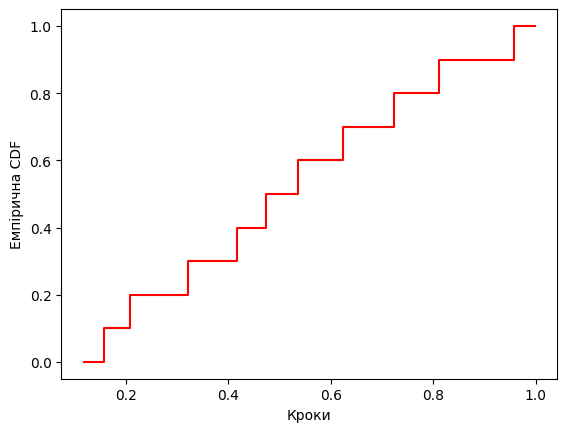

[0.007 0.016 0.021 0.027 0.058 0.063 0.076 0.077 0.088]
[0.1 0.2 0.3 0.4 0.6 0.7 0.8 0.9 1. ]


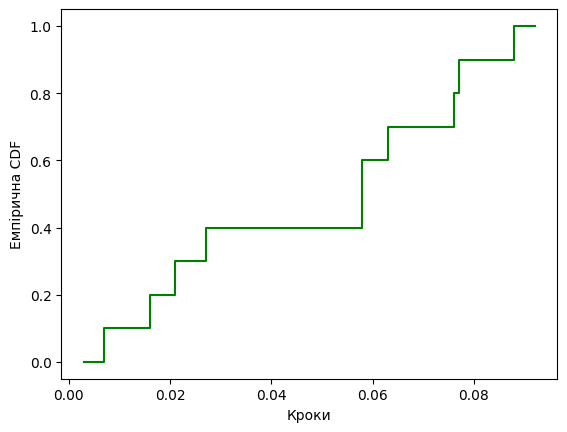

In [ ]:
from scipy import stats
table = PrettyTable()
table.field_names = ["Кількість","1","2", "3","4","5","6","7","8","9","10"]
table.add_row(["Випадкові числа",0.1578,0.2073,0.3214,0.4162,0.4729,0.5367,0.6241,0.7235,0.8120,0.9583])
table.hrules = 1
table.vrules = 1
print(table)

i = [0.1578,0.2073,0.3214,0.4162,0.4729,0.5367,0.6241,0.7235,0.8120,0.9583]
print("Вхідні дані=", i)
x_i_1=[1/10,2/10,3/10,4/10,5/10,6/10,7/10,8/10,9/10,(10-1)/10]
x_i_2=[(1-1)/10,(2-1)/10,(3-1)/10,(4-1)/10,(5-1)/10,(6-1)/10,(7-1)/10,(8-1)/10,(9-1)/10,1]
print("Емпірична функція розподілу=", x_i_1)
display(Math(r'\left | \frac{i}{10}-x_{i} \right |'))
print("Знайдемо значення точок у скачках")
F_n_x_1=[np.absolute(round(a-b,3)) for a, b in zip(i, x_i_1)]
print((F_n_x_1))
display(Math(r'\left | \frac{i-1}{10}-x_{i} \right |'))
print("Знайдемо значення точок перед скачками")
F_n_x_2=[np.absolute(round(c-d,3)) for c, d in zip(i, x_i_2)]
print((F_n_x_2))
print("Знайдемо максимум з 20 чисел")
# Знайдемо максимуми
max_F_n_x_1 = max(F_n_x_1)
max_F_n_x_2 = max(F_n_x_2)
print("Максимум з значення точок у скачках = ", max_F_n_x_1)
print("Максимум з значення точок перед скачками = ", max_F_n_x_2)
overall_max = max(max_F_n_x_1, max_F_n_x_2)
print("Знайдемо супремум")
display(Math(r'\underset{x}{sup}\left | F(x)-\hat{F_{n}(x)} \right |'))
print("sup = ", overall_max)
#
res = stats.ecdf(i)
print(res.cdf.quantiles)
print(res.cdf.probabilities)
ax = plt.subplot()
res.cdf.plot(ax,color="red")
ax.set_xlabel('Кроки')
ax.set_ylabel('Емпірична CDF')
plt.show()
#
res = stats.ecdf(F_n_x_1)
print(res.cdf.quantiles)
print(res.cdf.probabilities)
ax = plt.subplot()
res.cdf.plot(ax,color="green")
ax.set_xlabel('Кроки')
ax.set_ylabel('Емпірична CDF')
plt.show()

<a name='2-2'></a>
### Задача 15.14

Умова задачі

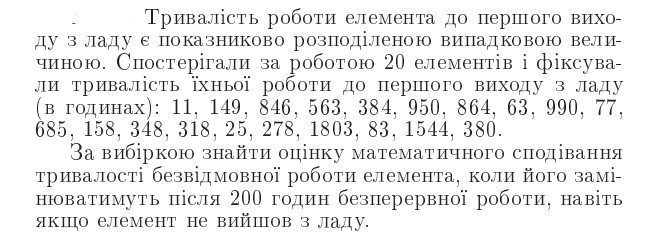



In [ ]:
table = PrettyTable()
table.field_names = ["Тривалість роботи елементів","1","2", "3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"]
table.add_row(["Дані",11,149,846,563,384,950,864,63,990,77,685,158,348,318,25,278,1803,83,1544,380])
table.hrules = 1
table.vrules = 1
print(table)

matrix = [[11,149,846,563,384,950,864,63,990,77,685,158,348,318,25,278,1803,83,1544,380]]
print("Вхідні дані=", matrix)
n=20
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] > 200:
            matrix[i][j] = 200
print("Змінені дані які > 200  на 200 за умовою задачі=", matrix)
print("Знайдемо середнє арифметичне чисел матриці")
display(Math(r'\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_{i}'))
x_average=np.mean(matrix)
print("Cереднє арифметичне чисел матриці і математичне сподівання вибірки =",x_average)

+-----------------------------+----+-----+-----+-----+-----+-----+-----+----+-----+----+-----+-----+-----+-----+----+-----+------+----+------+-----+
| Тривалість роботи елементів | 1  |  2  |  3  |  4  |  5  |  6  |  7  | 8  |  9  | 10 |  11 |  12 |  13 |  14 | 15 |  16 |  17  | 18 |  19  |  20 |
+-----------------------------+----+-----+-----+-----+-----+-----+-----+----+-----+----+-----+-----+-----+-----+----+-----+------+----+------+-----+
|             Дані            | 11 | 149 | 846 | 563 | 384 | 950 | 864 | 63 | 990 | 77 | 685 | 158 | 348 | 318 | 25 | 278 | 1803 | 83 | 1544 | 380 |
+-----------------------------+----+-----+-----+-----+-----+-----+-----+----+-----+----+-----+-----+-----+-----+----+-----+------+----+------+-----+
Вхідні дані= [[11, 149, 846, 563, 384, 950, 864, 63, 990, 77, 685, 158, 348, 318, 25, 278, 1803, 83, 1544, 380]]
Змінені дані які > 200  на 200 за умовою задачі= [[11, 149, 200, 200, 200, 200, 200, 63, 200, 77, 200, 158, 200, 200, 25, 200, 200, 83, 200, 2

<IPython.core.display.Math object>

Cереднє арифметичне чисел матриці і математичне сподівання вибірки = 158.3


<a name='2-3'></a>
### Задача 15.15

Умова задачі
15.15.
Нехай $\xi _{1},\xi _{2},...,\xi _{n}$ - вибірка з розподілу з щільністю
$f\left ( x;\alpha ,\theta  \right )=\left\{\begin{matrix}
\frac{(x-(\alpha -\sqrt{\theta }))}{\theta}, x\in[\alpha -\sqrt{\theta },\alpha] \\
\frac{-(x-(\alpha +\sqrt{\theta }))}{\theta}, x\in[\alpha,\alpha -\sqrt{\theta }]\\
0, x \notin [\alpha -\sqrt{\theta },\alpha +\sqrt{\theta }]\\
\end{matrix}\right.$

Знайти оцінки параметрів $\hat{\alpha }$ і $\hat{\theta }$ параметрів $\alpha$ і $\theta$ методом моментів.
З'ясувати, чи є $\hat{\alpha }$ і $\hat{\theta }$ незміщенними і спроможними оцінками параметрів $\alpha$ і $\theta$
Вказівка : обчислюючи другий момент, доцільно скористатися співвідношенням $\sigma ^{2} = m_{2}-m_{1}^{2}$

In [ ]:
#Вводимо данні
theta=4
a=0
#Шукаємо перші границі
a_minus_root_theta=a-np.sqrt(theta)
latex_expression_1 = f'[a - \\sqrt{{\\Theta}}, a] = [{a:.0f}, {a_minus_root_theta:.0f}]'
# Виводимо значення
display(Math(latex_expression_1))
#Шукаємо другі границі
a_plus_root_theta=a+np.sqrt(theta)
latex_expression_2 = f'[a, a + \\sqrt{{\\Theta}}] = [{a:.0f}, {a_plus_root_theta:.0f}]'
# Виводимо значення
display(Math(latex_expression_2))
# Знаходимо перший момент
print("Знаходимо перший момент")
def integrand_1(x):
	return(x)*(x-a_minus_root_theta)/theta
def integrand_2(x):
	return(x)*(-1)*(x-a_plus_root_theta)/theta
# Знаходимо інтеграли
integral_1, error_1 = quad(integrand_1, a_minus_root_theta, a)
integral_2, error_2 = quad(integrand_2, a, a_plus_root_theta)

# Знаходимо суму інтегралів
integral_sum_1 = integral_1 + integral_2

#Виводимо результат
latex_expression_3 = f"m_1(a, \Theta) : {integral_sum_1:.2f}"
print(f"Перший інтеграл =: {integral_1},з помилкою {error_1}")
print(f"Другий інтеграл =:  {integral_2},з помилкою {error_2}")
print("Сума двох інтегралів, яка дорівнює першому моменту")
display(Math(latex_expression_3))
# Знаходимо другий момент
print("Знаходимо другий момент")
def integrand_3(x):
	return(x**2)*(x-a_minus_root_theta)/theta
def integrand_4(x):
	return(x**2)*(-1)*(x-a_plus_root_theta)/theta
# Знаходимо інтеграли
integral_3, error_3 = quad(integrand_3, a_minus_root_theta, a)
integral_4, error_4 = quad(integrand_4, a, a_plus_root_theta)

# Знаходимо суму інтегралів
integral_sum_2 = integral_3 + integral_4
#Виводимо результат
latex_expression_4 = f"m_2(a, \Theta) : {integral_sum_2:.2f}"
print(f"Третій    інтеграл =: {integral_3},з помилкою {error_3}")
print(f"Четвертий інтеграл =:  {integral_4},з помилкою {error_4}")
print("Сума двох інтегралів, яка дорівнює другому моменту")
display(Math(latex_expression_4))
print("З наслідку теореми про вибіркове значення для параметру маємо")
display(Math(r'\hat{m_1}=\hat{a}'))
display(Math(r'\hat{m_2}=\hat{a^{2}}+\frac{\hat{\Theta}}{6}'))
print("Звідси ми можемо записати два рівняння для знаходження оцінок параметрів тета і а ")
display(Math(r'M\hat{a}=\frac{1}{n}\sum_{i=1}^{n}\xi_{i} => \frac{1}{n}\sum_{i=1}^{n}M\xi_{i}'))
print('Далі з наслідку про математичне сподівання суми ряду')
display(Math(r'M\hat{a}=\frac{1}{n}\sum_{i=1}^{n}M\xi_{i}=a'))
latex_expression_5 = f'M\hat a = a = {a}'
# Виводимо значення
display(Math(latex_expression_5))
# тепер для параметра тета
print("Tепер для параметра тета ")
display(Math(r'M\hat{\sigma}^2=6*M(\hat{m_2}-\hat{m_1}^2)=>6*M(\hat{a}^2+\frac{\hat{\theta }}{6}-\hat{a}^2)=M\hat{\theta }'))
print('Далі з теореми 15.1.1 маємо що оцінки є обґрунтованими і незміщенними.')
display(Math(r'M\hat{\sigma}^2=\theta'))
latex_expression_6 = f'M\hat\sigma^2 =\\theta = {theta}'
# Виводимо значення
display(Math(latex_expression_6))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Знаходимо перший момент
Перший інтеграл =: -0.33333333333333337,з помилкою 3.700743415417189e-15
Другий інтеграл =:  0.33333333333333337,з помилкою 3.700743415417189e-15
Сума двох інтегралів, яка дорівнює першому моменту


<IPython.core.display.Math object>

Знаходимо другий момент
Третій    інтеграл =: 0.33333333333333337,з помилкою 3.700743415417189e-15
Четвертий інтеграл =:  0.33333333333333337,з помилкою 3.700743415417189e-15
Сума двох інтегралів, яка дорівнює другому моменту


<IPython.core.display.Math object>

З наслідку теореми про вибіркове значення для параметру маємо


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Звідси ми можемо записати два рівняння для знаходження оцінок параметрів тета і а 


<IPython.core.display.Math object>

Далі з наслідку про математичне сподівання суми ряду


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Tепер для параметра тета 


<IPython.core.display.Math object>

Далі з теореми 15.1.1 маємо що оцінки є обґрунтованими і незміщенними.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
# Створюємо вибірку за допомогою linspace
data = np.linspace(1.0, 10000.0, 8)

# Перший момент (середнє)
print("Знайдемо перший момент")
m1 = np.mean(data)
print(m1)
# Другий момент
print("Знайдемо другий момент")
m2 = np.mean(data**2)
print(m2)

# Оцінка параметра a
a_hat = m1
display(Math(r'\hat{m_1}=\hat{a}'))

# Оцінка параметра theta
theta_hat = 6/(m2 - m1**2)
display(Math(r'\hat{\theta }=\frac{6}{\hat{m_{2}}-\hat{m_{1}^{2}}}'))

print(f"Оцінка a: {a_hat}")
print(f"Оцінка θ: {theta_hat}")

# Параметри трикутного розподілу
c = 0.158
loc = a_hat - np.sqrt(theta_hat)
scale = 2 * np.sqrt(theta_hat)

# Створюємо трикутний розподіл з оціненими параметрами
triang_dist = triang(c, loc=loc, scale=scale)

# Перевіряємо моменти
mean = triang_dist.mean()
var = triang_dist.var()

print(f"Середнє: {mean}")
print(f"Дисперсія: {6/var}")


Знайдемо перший момент
5000.5
Знайдемо другий момент
35717143.21428572


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Оцінка a: 5000.5
Оцінка θ: 5.601120168022402e-07
Середнє: 5000.49982936336
Дисперсія: 55601666.66584279


<a name='2-4'></a>
### Задача 15.16

Умова задачі

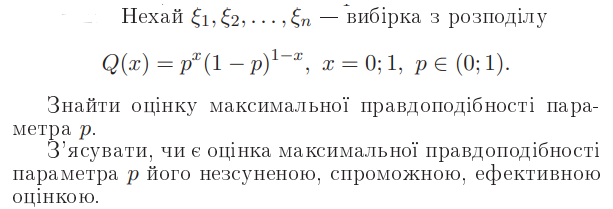

In [ ]:
from scipy.stats import bernoulli
print("Випишемо наш розподіл бернулі")
display(Math(r'Q(x)=\rho ^{x}(x-\rho )^{1-x}, x=(0;1),\rho \in (0,1)'))
# Генеруємо вибіркові дані
n = 10000  # розмір вибірки
p_true = 0.3  # істинний параметр
data = bernoulli.rvs(p_true, size=n)

# Оцінка максимальної правдоподібності (MLE)
p_mle = np.mean(data)
print(f"Оцінка максимальної правдоподібності для p: {p_mle}")

# Властивості оцінювача MLE
consistent = np.allclose(p_mle, p_true, atol=0.1)  # використання допуску для кінцевого розміру вибірки
efficient = True  # за теорією, вибіркове середнє є ефективним для розподілу Бернуллі

print(f"Оцінка завжди буде незміщенною за формулою ")
display(Math(r'M\hat{\rho }=nM\bar{\xi }=\frac{n}{n}\sum_{i=1}^{n}M\xi _{i}=\rho '))
print(f"Спроможна: {consistent}")
print(f"Ефективний: {efficient}")

Випишемо наш розподіл бернулі


<IPython.core.display.Math object>

Оцінка максимальної правдоподібності для p: 0.3003
Оцінка завжди буде незміщенною за формулою 


<IPython.core.display.Math object>

Спроможна: True
Ефективний: True


<a name='4'></a>
## Завдання 12. Перевірка гіпотез про параметри нормального розподілу

<a name='4-1'></a>
### Задача 17.10

Умова задачі

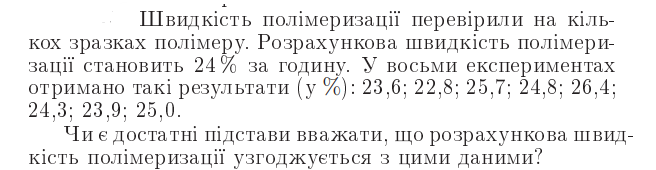

In [ ]:
table = PrettyTable()
table.field_names = ["Швидкість полімерізації в %","1","2", "3","4","5","6","7","8"]
table.add_row(["Дані",23.6,22.8,25.7,24.8,26.4,24.3,23.9,25.0])


table.hrules = 1
table.vrules = 1
print(table)
#
matrix = [[23.6,22.8,25.7,24.8,26.4,24.3,23.9,25.0]]
print("Дані =", matrix)
print("Нульова гіпотеза H\u2080 : a=24, альтернатива двухстороння")
n=8
Alph=24
print("За формулою вибору статистики для побудови критерію")
display(Math(r'\bar{\xi }=\frac{1}{n}\sum_{i=1}^{n}\xi _{i}'))
Xi_av=(matrix[0][0]+matrix[0][1]+matrix[0][2]+matrix[0][3]+matrix[0][4]+matrix[0][5]+matrix[0][6]+matrix[0][7])/n
print("Вибір статистики для побудови критерію для КСІ=",round(Xi_av,4))

#За теоремою  про оцінку s^2 маємо

print("За теоремою  про оцінку s^2 маємо")
display(Math(r's_{\xi }^{2}=\frac{1}{n-1}\sum_{i=1}^{n}(\xi _{i}-\bar{\xi })^{2}'))
s_square_Xi_av=((matrix[0][0]-Xi_av)**2+(matrix[0][1]-Xi_av)**2+(matrix[0][2]-Xi_av)**2+(matrix[0][3]-Xi_av)**2+(matrix[0][4]-Xi_av)**2+(matrix[0][5]-Xi_av)**2+(matrix[0][6]-Xi_av)**2+(matrix[0][7]-Xi_av)**2)/(n-1)
print("Оцінка s^2 для КСІ=",round(s_square_Xi_av,4))

#Знайдемо критерій Стьюдента
print("Знайдемо розподіл Стьюдента з n-1 ступенями свободи за теоремою про розподіл вектора")
display(Math(r't=\frac{\left | \bar{\xi } - a \right |}{\frac{s}{\sqrt{n}}}'))
t=(Xi_av-Alph)/(np.sqrt(s_square_Xi_av)*(1/np.sqrt(n)))
print("Критерій Стьюдента=",round(t,3))


print("Випишемо критичне значення за таблицею Стьюдента ")
t_Alpha_7=2.365
level_of_significance= f"t(\\alpha/2;n ) =t(0,025;7)= {t_Alpha_7:.4f}"
display(Math(level_of_significance))
print("Тепер зробимо преревірку наше відхилення менше за сталий рівень значущості і виберемо відхиляти гіпотезу чи ні  ")

if t<t_Alpha_7:
  print( 'Гіпотеза H\u2080 не відхиляється')
else:
  print("Гіпотеза H\u2080 відхиляється")

+-----------------------------+------+------+------+------+------+------+------+------+
| Швидкість полімерізації в % |  1   |  2   |  3   |  4   |  5   |  6   |  7   |  8   |
+-----------------------------+------+------+------+------+------+------+------+------+
|             Дані            | 23.6 | 22.8 | 25.7 | 24.8 | 26.4 | 24.3 | 23.9 | 25.0 |
+-----------------------------+------+------+------+------+------+------+------+------+
Дані = [[23.6, 22.8, 25.7, 24.8, 26.4, 24.3, 23.9, 25.0]]
Нульова гіпотеза H₀ : a=24, альтернатива двухстороння
За формулою вибору статистики для побудови критерію


<IPython.core.display.Math object>

Вибір статистики для побудови критерію для КСІ= 24.5625
За теоремою  про оцінку s^2 маємо


<IPython.core.display.Math object>

Оцінка s^2 для КСІ= 1.3512
Знайдемо розподіл Стьюдента з n-1 ступенями свободи за теоремою про розподіл вектора


<IPython.core.display.Math object>

Критерій Стьюдента= 1.369
Випишемо критичне значення за таблицею Стьюдента 


<IPython.core.display.Math object>

Тепер зробимо преревірку наше відхилення менше за сталий рівень значущості і виберемо відхиляти гіпотезу чи ні  
Гіпотеза H₀ не відхиляється


<a name='4-2'></a>
### Задача 17.11

Умова задачі

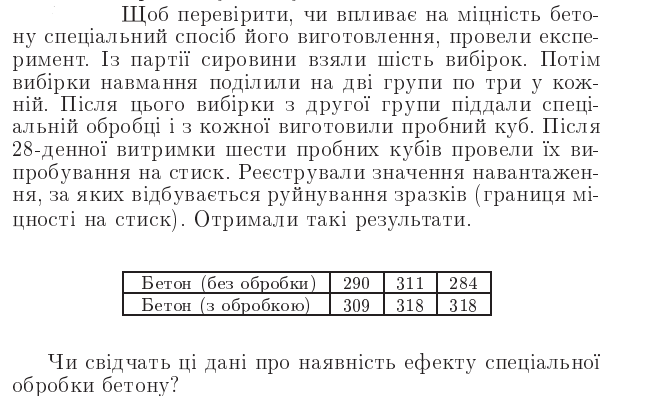

In [ ]:
table = PrettyTable()
table.field_names = ["Тип бетону","1","2", "3"]
table.add_row(["Бетон(без обробки)",290,311,284])
table.add_row(["Бетон(з обробки)",309,318,318])


table.hrules = 1
table.vrules = 1
print(table)
#
matrix = [[290,311,284],
    [309,318,318]]
print("Matrix =", matrix)
print("Висуваємо нульову гіпотезу і альтернативну до неї односторонню гіпотезу")
display(Math(r'H_{0}:\alpha _{\xi }=\alpha _{\eta }'))
display(Math(r'\alpha _{\eta }>\alpha _{\xi }'))
print("За формулою вибору статистики для побудови критерію")
display(Math(r'\bar{\xi }=\frac{1}{n}\sum_{i=1}^{n}\xi _{i},\bar{\eta  }=\frac{1}{m}\sum_{j=1}^{m}\eta _{i}'))

n=3
m=3
Xi=(matrix[0][0]+matrix[0][1]+matrix[0][2])/n
print("Вибір статистики для побудови критерію для КСІ=",Xi)
Eta=(matrix[1][0]+matrix[1][1]+matrix[1][2])/m
print("Вибір статистики для побудови критерію для Нью=",Eta)
#За теоремою  про оцінку s^2 маємо
print("За теоремою  про оцінку s^2 маємо")
display(Math(r's_{\xi }^{2}=\frac{1}{n-1}\sum_{i=1}^{n}(\xi _{i}-\bar{\xi })^{2}'))
s_square_Xi=((matrix[0][0]-Xi)**2+(matrix[0][1]-Xi)**2+(matrix[0][2]-Xi)**2)/(n-1)
print("Оцінка s^2 для КСІ=",s_square_Xi)
display(Math(r's_{\eta }^{2}=\frac{1}{m-1}\sum_{j=1}^{m}(\eta _{i}-\bar{\eta })^{2}'))

s_square_Eta=((matrix[1][0]-Eta)**2+(matrix[1][1]-Eta)**2+(matrix[1][2]-Eta)**2)/(m-1)
print("Оцінка s^2 для Нью=",s_square_Eta)
#Загальна сума оцінок
display(Math(r's^{2}=\frac{1}{n+m-2}((n-1)s_{\xi }^{2}+(m-1)s_{\eta }^{2})'))
s_square_Xi_Eta=((n-1)*s_square_Xi+(m-1)*s_square_Eta)/(n+m-2)
print("Загальна оцінка s^2 =",s_square_Xi_Eta)
print("Знайдемо критерій Стьюдента")
display(Math(r't=\frac{\left | \bar{\xi }-\bar{\eta } \right |}{s\sqrt{\frac{1}{n}+\frac{1}{m}}}'))
t=(Eta-Xi)/(np.sqrt(s_square_Xi_Eta)*np.sqrt((1/n)+(1/m)))
print("Критерій Стьюдента=",round(t,3))

print("Випишемо значення для рівня значущості")
t_Alpha_4=2.132
level_of_significance= f"t_\\alpha n+m-2  =t(0,05;4) = {t_Alpha_4:.4f}"
display(Math(level_of_significance))
print("Тепер зробимо преревірку наше відхилення менше за сталий рівень значущості і виберемо відхиляти гіпотезу чи ні  ")

if t<t_Alpha_4:
  print( 'Гіпотеза H\u2080 не відхиляється')
else:
  print("Гіпотеза H\u2080 відхиляється")

+--------------------+-----+-----+-----+
|     Тип бетону     |  1  |  2  |  3  |
+--------------------+-----+-----+-----+
| Бетон(без обробки) | 290 | 311 | 284 |
+--------------------+-----+-----+-----+
|  Бетон(з обробки)  | 309 | 318 | 318 |
+--------------------+-----+-----+-----+
Matrix = [[290, 311, 284], [309, 318, 318]]
Висуваємо нульову гіпотезу і альтернативну до неї односторонню гіпотезу


<IPython.core.display.Math object>

<IPython.core.display.Math object>

За формулою вибору статистики для побудови критерію


<IPython.core.display.Math object>

Вибір статистики для побудови критерію для КСІ= 295.0
Вибір статистики для побудови критерію для Нью= 315.0
За теоремою  про оцінку s^2 маємо


<IPython.core.display.Math object>

Оцінка s^2 для КСІ= 201.0


<IPython.core.display.Math object>

Оцінка s^2 для Нью= 27.0


<IPython.core.display.Math object>

Загальна оцінка s^2 = 114.0
Знайдемо критерій Стьюдента


<IPython.core.display.Math object>

Критерій Стьюдента= 2.294
Випишемо значення для рівня значущості


<IPython.core.display.Math object>

Тепер зробимо преревірку наше відхилення менше за сталий рівень значущості і виберемо відхиляти гіпотезу чи ні  
Гіпотеза H₀ відхиляється


<a name='4-3'></a>
### Задача 17.12

Умова задачі

17.12.З метою зменшення виходу небажаного побічного продукту використовували катализатори А і В. Для кожного з них були отримані вибірки виходу небажаного продукту (в %).

Катализатор А: 41; 52; 29; 43; 38; 45; 52; 42; 36.

Катализатор В: 40; 27; 59; 42; 25; 58; 42; 26; 37.

Чи можна вважати, що розброс виходу небажаного продукту при використанні катализаторів А і В однаковий?

Зауваження. Розброс характеризується дисперсією.

In [ ]:
#Введемо дані
catalyser_A=[41,52,29,43,38,45,52,42,36]
print("Дані каталізатора А :",catalyser_A)
catalyser_B=[40,27,59,42,25,58,42,26,37]
print("Дані каталізатора В :",catalyser_B)
#Вибір статистики для побудови критерію для КСІ
display(Math(r'\sigma _{\xi }^{2},\sigma _{\eta}^{2}'))
print("Дисперсії виходу небажаного продукту при використанні відповідно каталізатора А і В")
print("Введемо нульову гіпотезу з двухсторонньою альтернативою гіпотезою ")
display(Math(r'H_{0}:\frac{\sigma _{\xi }^{2}}{\sigma _{\eta}^{2}} = 1'))
display(Math(r'\frac{\sigma _{\xi }^{2}}{\sigma _{\eta}^{2}} < 1 \vee \frac{\sigma _{\xi }^{2}}{\sigma _{\eta}^{2}} > 1'))

print("За формулою вибору статистики для побудови критерію")
display(Math(r'\bar{\xi }=\frac{1}{n}\sum_{i=1}^{n}\xi _{i},\bar{\eta  }=\frac{1}{m}\sum_{j=1}^{m}\eta _{i}'))

XI=np.mean(catalyser_A)
print("Вибір статистики для побудови критерію для КСІ=",XI)
#Вибір статистики для побудови критерію для Нью
ETA=np.mean(catalyser_B)
print("Вибір статистики для побудови критерію для Нью=",round(ETA,3))
#За теоремою  про оцінку s^2 маємо
print("За теоремою  про оцінку s^2 маємо")
display(Math(r's_{\xi }^{2}=\frac{1}{n-1}\sum_{i=1}^{n}(\xi _{i}-\bar{\xi })^{2}'))
s_square_XI=np.sum((catalyser_A-XI)**2/(len(catalyser_A)-1))
print("Оцінка s^2 для КСІ=",s_square_XI)
display(Math(r's_{\eta }^{2}=\frac{1}{m-1}\sum_{j=1}^{m}(\eta _{i}-\bar{\eta })^{2}'))
s_square_ETA=np.sum((catalyser_B-ETA)**2/(len(catalyser_B)-1))
print("Оцінка s^2 для Нью=",round(s_square_ETA,2))
#Для перевірки гіпотези сігма квадрать ксі поділити на сігма квадрат нью дорівнює 1 використаємо критерій
print("Для перевірки гіпотези сігма квадрать ксі поділити на сігма квадрат нью дорівнює 1 використаємо критерій")
display(Math(r'H_{0}:\frac{\sigma _{\xi }^{2}}{\sigma _{\eta}^{2}} = 1'))
display(Math(r' \frac{1}{F_{\alpha ;n-1,m-1}}<\frac{s_{\xi }^{2}}{s_{\eta }^{2}} < F_{\alpha ;n-1,m-1}'))
S_XI_ETA=s_square_XI/s_square_ETA
print('Критерій для перевірки гіпотези = ',round(S_XI_ETA,3))
#За данними критерія знаходимо табличні значення
print("Випишемо значення для рівня значущості")
F_alpha_n_m=6.03
level_of_significance= f"F_\\alpha ,n-1,m-1  = F(0,01;8;8) = {F_alpha_n_m:.2f}"
display(Math(level_of_significance))
print("Тепер зробимо преревірку наше відхилення менше за сталий рівень значущості і виберемо відхиляти гіпотезу чи ні  ")

if 1/F_alpha_n_m<S_XI_ETA<F_alpha_n_m:
  print('Гіпотезу H\u2080 на 1% занчущості не відхиляємо ')
else:
  print('Гіпотезу H\u2080 на 1% занчущості відхиляємо')




Дані каталізатора А : [41, 52, 29, 43, 38, 45, 52, 42, 36]
Дані каталізатора В : [40, 27, 59, 42, 25, 58, 42, 26, 37]


<IPython.core.display.Math object>

Дисперсії виходу небажаного продукту при використанні відповідно каталізатора А і В
Введемо нульову гіпотезу з двухсторонньою альтернативою гіпотезою 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

За формулою вибору статистики для побудови критерію


<IPython.core.display.Math object>

Вибір статистики для побудови критерію для КСІ= 42.0
Вибір статистики для побудови критерію для Нью= 39.556
За теоремою  про оцінку s^2 маємо


<IPython.core.display.Math object>

Оцінка s^2 для КСІ= 54.0


<IPython.core.display.Math object>

Оцінка s^2 для Нью= 161.28
Для перевірки гіпотези сігма квадрать ксі поділити на сігма квадрат нью дорівнює 1 використаємо критерій


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Критерій для перевірки гіпотези =  0.335
Випишемо значення для рівня значущості


<IPython.core.display.Math object>

Тепер зробимо преревірку наше відхилення менше за сталий рівень значущості і виберемо відхиляти гіпотезу чи ні  
Гіпотезу H₀ на 1% занчущості не відхиляємо 


<a name='5'></a>
## Завдання 13. Критерій $\chi^2$

<a name='5-1'></a>
### Задача 18.12

Умова задачі

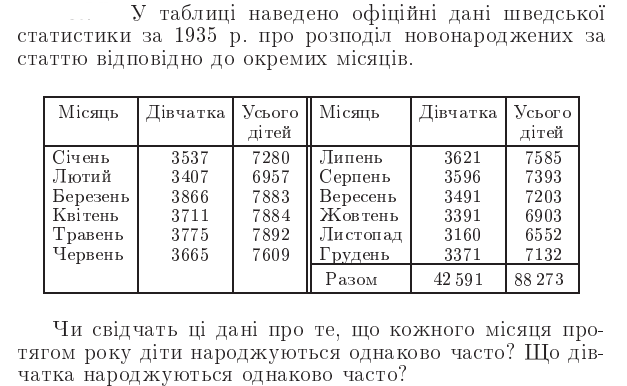

In [ ]:
table = PrettyTable()
table.field_names = ["Місяць", "Дівчата", "Всього дітей","Хлопці"]
table.add_row(["Січень",3537,7280,3744])
table.add_row(["Лютий",3407,6957,3550])
table.add_row(["Березень",3866,7883,4017])
table.add_row(["Квітень",3711,7884,4173])
table.add_row(["Травень",3775,7892,4117])
table.add_row(["Червень",3665,7609,3944])
table.add_row(["Липень",3621,7585,3964])
table.add_row(["Серпень",3596,7393,3797])
table.add_row(["Вересень",3491,7203,3712])
table.add_row(["Жовтень",3391,6903,3512])
table.add_row(["Листопад",3160,6552,3392])
table.add_row(["Грудень",3371,7132,3761])
table.add_row(["Разом",42591,88273,45682])


table.hrules = 1
table.vrules = 1

print(table)
print("Висуваємо нульову гіпотезу і альтернативну до неї односторонню гіпотезу")
display(Math(r'H_{0}:\rho =\frac{1}{2}'))
display(Math(r'\rho \neq \frac{1}{2}'))
print("За таблилею спряженості ознак маємо s=12,k=12,n=88273")
n_1=88273
n_2=42591
print("Знайдемо наші n_p_i")
display(Math(r'np_{j_{1}}'))
n_p_i_1=n_1/12
print(round(n_p_i_1,3))
display(Math(r'np_{j_{2}}'))
n_p_i_2=n_2/12
print(n_p_i_2)

matrix = [[3537,3407,3866,3711,3775,3665,3621,3596,3491,3391,3160,3371],
          [7280,6957,7883,7884,7892,7609,7585,7393,7203,6903,6552,7132]]
for row in matrix:
  print("Дані рядків =",row)
print("Перевіримо, що наші дані можна використовувати для вирішення задачі")
if (matrix[0][0]*n_2)/n_1>=10:
  print("Можна скористатися критерієм хі квадрат за даними народжуваності дівчат")
else:
  print("Не можна скористатися критерієм хі квадрат за даними народжуваності дівчат")

print("Запишемо наш критерій хі кввадрат для відомих параметрів")
display(Math(r'D(\hat{F_{n}},G)=\sum_{j=1}^{r}\left ( \frac{\vartheta _{j}-np_{j}}{\sqrt{np_{j}}} \right )^{2}'))
D_1 = sum(((matrix[1][j] - n_p_i_1) / np.sqrt(n_p_i_1)) ** 2 for j in range(12))
print("D =", round(D_1,3))

D_2 = sum(((matrix[0][j] - n_p_i_2) / np.sqrt(n_p_i_2)) ** 2 for j in range(12))

print("D =", round(D_2,3))
print("Випишемо значення для рівня значущості")
CHI_square=21.03
level_of_significance= f"\\chi^2_\\alpha ,r-1  = \\chi^2(0,05;11) = {CHI_square:.2f}"
display(Math(level_of_significance))
print("Тепер зробимо преревірку наше відхилення менше за сталий критерій хі квадрат і виберемо відхиляти гіпотезу чи ні  ")
if D_1<CHI_square:
  print( 'Отже згідно з критерієм ХІ квадрат гіпотеза не відхиляється і діти народжуються однаково часто')
else:
  print("Отже згідно з критерієм ХІ квадрат гіпотеза відхиляється  і діти народжуються не однаково часто")
if D_2<CHI_square:
  print( 'Отже згідно з критерієм ХІ квадрат гіпотеза не відхиляється і дівчатка народжуються однаково часто')
else:
  print("Отже згідно з критерієм ХІ квадрат гіпотеза відхиляється  і дівчатка народжуються не однаково часто")

+----------+---------+--------------+--------+
|  Місяць  | Дівчата | Всього дітей | Хлопці |
+----------+---------+--------------+--------+
|  Січень  |   3537  |     7280     |  3744  |
+----------+---------+--------------+--------+
|  Лютий   |   3407  |     6957     |  3550  |
+----------+---------+--------------+--------+
| Березень |   3866  |     7883     |  4017  |
+----------+---------+--------------+--------+
| Квітень  |   3711  |     7884     |  4173  |
+----------+---------+--------------+--------+
| Травень  |   3775  |     7892     |  4117  |
+----------+---------+--------------+--------+
| Червень  |   3665  |     7609     |  3944  |
+----------+---------+--------------+--------+
|  Липень  |   3621  |     7585     |  3964  |
+----------+---------+--------------+--------+
| Серпень  |   3596  |     7393     |  3797  |
+----------+---------+--------------+--------+
| Вересень |   3491  |     7203     |  3712  |
+----------+---------+--------------+--------+
| Жовтень  | 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

За таблилею спряженості ознак маємо s=12,k=12,n=88273
Знайдемо наші n_p_i


<IPython.core.display.Math object>

7356.083


<IPython.core.display.Math object>

3549.25
Дані рядків = [3537, 3407, 3866, 3711, 3775, 3665, 3621, 3596, 3491, 3391, 3160, 3371]
Дані рядків = [7280, 6957, 7883, 7884, 7892, 7609, 7585, 7393, 7203, 6903, 6552, 7132]
Перевіримо, що наші дані можна використовувати для вирішення задачі
Можна скористатися критерієм хі квадрат за даними народжуваності дівчат
Запишемо наш критерій хі кввадрат для відомих параметрів


<IPython.core.display.Math object>

D = 278.928
D = 121.236
Випишемо значення для рівня значущості


<IPython.core.display.Math object>

Тепер зробимо преревірку наше відхилення менше за сталий критерій хі квадрат і виберемо відхиляти гіпотезу чи ні  
Отже згідно з критерієм ХІ квадрат гіпотеза відхиляється  і діти народжуються не однаково часто
Отже згідно з критерієм ХІ квадрат гіпотеза відхиляється  і дівчатка народжуються не однаково часто


<a name='5-2'></a>
### Задача 18.15

Умова задачі
18.15. (колір волосся і колір очей).

У таблиці наведені дані про 147 навмання вибраних студентів, які були розподілені згідно кольору їх волосся (світле, темне) та очей (блакитні, карі).


| Колір волосся | Блакитні очі | Карі очі | Всього |
|---------------|--------------|----------|--------|
| Темне         | 31           | 41       | 72     |
| Світле        | 40           | 35       | 75     |
| Всього        | 71           | 76       | 147    |
Чи можна на підставі цих даних зробити висновок про те, що колір очей пов'язаний з кольором волосся?







In [ ]:
table = PrettyTable()
table.field_names = ["Колір волосся","Колір очей","Колір очей.", "Всього"]
table.add_row(["","Блакитні","Карі",""])
table.add_row(["Темне",31,41, 72])
table.add_row(["Світле",40,35,75])
table.add_row(["Всього ",71,76,147])

table.hrules = 1
table.vrules = 1
print(table)
print(" У термінах перевірки статистичних гіпотез поставлене завдання формулюється як завдання перевірки гіпотези про незалежність того, що колір очей пов'язаний з кольором волосся")
print("За таблилею спряженості ознак маємо s=2,k=2,n=147")
matrix = [[31,41, 72],
    [40,35,75],
    [71,76,147]]
print("Дані рядків =", matrix)
print("Перевіримо, що наші дані можна використовувати для вирішення задачі")
if matrix[0][2]*matrix[2][0]>=10:
  print("Можна скористатися критерієм хі квадрат")
else:
  print("Не можна скористатися критерієм хі квадрат")
print("Запишемо наше відхилення за формулою")
display(Math(r'D(\hat{F_{n}},G)=\sum_{i=1}^{s}\sum_{j=1}^{k}\frac{(v_{i,j}-(v_{i}v_{j}/n))^2}{v_{i}v_{j}/n}'))
D_f_g=((matrix[0][0]-matrix[0][2]*matrix[2][0]/matrix[2][2])**2/(matrix[0][2]*matrix[2][0]/matrix[2][2]))+((matrix[0][1]-matrix[0][2]*matrix[2][1]/matrix[2][2])**2/(matrix[0][2]*matrix[2][1]/matrix[2][2]))+((matrix[1][0]-matrix[1][2]*matrix[2][0]/matrix[2][2])**2/(matrix[1][2]*matrix[2][0]/matrix[2][2]))+((matrix[1][1]-matrix[1][2]*matrix[2][1]/matrix[2][2])**2/(matrix[1][2]*matrix[2][1]/matrix[2][2]))
print("D = ",D_f_g)
print("Випишемо значення для рівня значущості")
CHI_square=3.84
level_of_significance= f"\\chi^2_\\alpha ,s-1,k-1  = \\chi^2(0,05;1) = {CHI_square:.2f}"
display(Math(level_of_significance))
print("Тепер зробимо преревірку наше відхилення менше за сталий критерій хі квадрат і виберемо відхиляти гіпотезу чи ні  ")
if D_f_g<CHI_square:
  print( 'Отже згідно з критерієм ХІ квадрат гіпотеза не відхиляється')
else:
  print("Отже згідно з критерієм ХІ квадрат гіпотеза відхиляється")

+---------------+------------+-------------+--------+
| Колір волосся | Колір очей | Колір очей. | Всього |
+---------------+------------+-------------+--------+
|               |  Блакитні  |     Карі    |        |
+---------------+------------+-------------+--------+
|     Темне     |     31     |      41     |   72   |
+---------------+------------+-------------+--------+
|     Світле    |     40     |      35     |   75   |
+---------------+------------+-------------+--------+
|    Всього     |     71     |      76     |  147   |
+---------------+------------+-------------+--------+
 У термінах перевірки статистичних гіпотез поставлене завдання формулюється як завдання перевірки гіпотези про незалежність того, що колір очей пов'язаний з кольором волосся
За таблилею спряженості ознак маємо s=2,k=2,n=147
Дані рядків = [[31, 41, 72], [40, 35, 75], [71, 76, 147]]
Перевіримо, що наші дані можна використовувати для вирішення задачі
Можна скористатися критерієм хі квадрат
Запишемо наше ві

<IPython.core.display.Math object>

D =  1.553952001482581
Випишемо значення для рівня значущості


<IPython.core.display.Math object>

Тепер зробимо преревірку наше відхилення менше за сталий критерій хі квадрат і виберемо відхиляти гіпотезу чи ні  
Отже згідно з критерієм ХІ квадрат гіпотеза не відхиляється


<a name='5-3'></a>
### Задача 18.18

Умова задачі

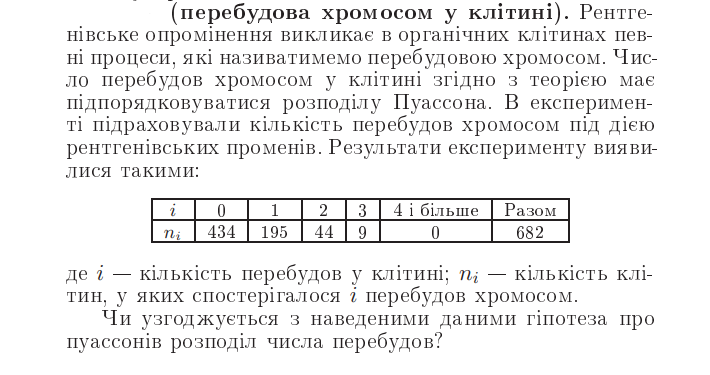

In [ ]:
table = PrettyTable()
table.field_names = ["i","0", "1", "2","3","4 і більше","Всього"]
table.add_row(["N_i",434,195,44,9,0,682])
table.hrules = 1
table.vrules = 1

print(table)
print("Щодо невідомого розподілу висувається нульова гіпотеза")
display(Math(r'H_{0}: P_{\xi }(k)=\frac{\lambda ^{k}}{k!}e^{-\lambda },k=0,1,....,'))
print("Щоб перевірити гіпотезу Пірсона використаємо критерій Пірсона. параметр лямбда гіпотетичного розподілу невідомий")
print("З вибору статистики для побудови критерію")
display(Math(r'\hat{\lambda }=\frac{1}{n}\sum_{i=1}^{n}\xi _{i}'))
Total=682
i=[0,1,2,3,4]
N_i=[434,195,44,9,0]
LAMBDA=[a*b for a, b in zip(i, N_i)]
#
LAMBDA_sum=round(np.sum(LAMBDA)/Total,3)
print("Значення параметра лямбда з куточком = ",LAMBDA_sum)
print("Знайдемо значення розподілу Пуассона")
display(Math(r'P_{\lambda }(k)=\frac{\lambda^{k} }{k!}e^{-\lambda }'))

k=[0,1,2,3]
poisson_pmf=poisson.pmf(k,LAMBDA_sum)
for value, P in zip(k, poisson_pmf):
    print(f"P(X = {value}) = {P:.4f}")
# Створимо новий список CHI
print("Вибираємо і розбиваємо вибірковий простір хі на неперитинні множини")
display(Math(r'\chi _{i}'))
CHI=np.round(Total*poisson_pmf,3)
CHI_results = []

for chi in CHI:
 if chi>10:
  CHI_results.append(chi)
 else:
  print("Так як один з елементів розподілу менший за 10 то ми записуємо новий елемент замість того, що не підійшов")
  display(Math(r'\chi _{3}<10,\chi _{2}=\left \{ 2,3,.. \right \}'))
  chi_new=np.round(Total*(1-poisson.pmf(0,LAMBDA_sum)-poisson.pmf(1,LAMBDA_sum)),3)
  print(f"CHI = {chi_new:.4f}")

if CHI_results[-1] > 10:
    CHI_results[-1] = chi_new
print("Записуємо наші нові єлементи які задовільняють умові")
print(f"CHI_results: {CHI_results}")
print("Створюємо нову таблицю даних")

N_i_new=[434,195,53]
table = PrettyTable()
table.field_names = ["i","0", "1", "2","Всього"]
table.add_row(["N_i",434,195,53,682])
table.add_row(["CHI_results"] + CHI_results + [""])
table.hrules = 1
table.vrules = 1
# Выводим таблицу
print(table)
print("Запишемо формулу гіпотетичного розподілу")
display(Math(r'D(\hat{F_{n}},G)=\sum_{i=1}^{r}\frac{(\vartheta_{i}-np_{i} }{np_{i})^2}>\chi_{\alpha ,r-1-k} ^{2}'))
D_F_G=[np.sum(((n_i-chi_results)**2)/chi_results) for n_i,chi_results in zip(N_i_new,CHI_results)]
print("Гіпотетичний розподіл дорівнює = ",sum(D_F_G))

CHI_square=5.99
print("Випишемо значення для рівня значущості")
level_of_significance= f"\\chi^2_\\alpha ,r-1-k  = \\chi^2(0,05;2) = {CHI_square:.2f}"

display(Math(level_of_significance))
print("Тепер зробимо преревірку що гіпотетичний розподіл менший за сталий критерій хі квадрат і виберемо відхиляти гіпотезу чи ні  ")

if sum(D_F_G)<CHI_square:
  print( 'Гіпотеза H\u2080 не відхиляється ')
else:
  print("Гіпотеза H\u2080 відхиляється")

+-----+-----+-----+----+---+------------+--------+
|  i  |  0  |  1  | 2  | 3 | 4 і більше | Всього |
+-----+-----+-----+----+---+------------+--------+
| N_i | 434 | 195 | 44 | 9 |     0      |  682   |
+-----+-----+-----+----+---+------------+--------+
Щодо невідомого розподілу висувається нульова гіпотеза


<IPython.core.display.Math object>

Щоб перевірити гіпотезу Пірсона використаємо критерій Пірсона. параметр лямбда гіпотетичного розподілу невідомий
З вибору статистики для побудови критерію


<IPython.core.display.Math object>

Значення параметра лямбда з куточком =  0.455
Знайдемо значення розподілу Пуассона


<IPython.core.display.Math object>

P(X = 0) = 0.6344
P(X = 1) = 0.2887
P(X = 2) = 0.0657
P(X = 3) = 0.0100
Вибираємо і розбиваємо вибірковий простір хі на неперитинні множини


<IPython.core.display.Math object>

Так як один з елементів розподілу менший за 10 то ми записуємо новий елемент замість того, що не підійшов


<IPython.core.display.Math object>

CHI = 52.4310
Записуємо наші нові єлементи які задовільняють умові
CHI_results: [432.694, 196.876, 52.431]
Створюємо нову таблицю даних
+-------------+---------+---------+--------+--------+
|      i      |    0    |    1    |   2    | Всього |
+-------------+---------+---------+--------+--------+
|     N_i     |   434   |   195   |   53   |  682   |
+-------------+---------+---------+--------+--------+
| CHI_results | 432.694 | 196.876 | 52.431 |        |
+-------------+---------+---------+--------+--------+
Запишемо формулу гіпотетичного розподілу


<IPython.core.display.Math object>

Гіпотетичний розподіл дорівнює =  0.027992995544308345
Випишемо значення для рівня значущості


<IPython.core.display.Math object>

Тепер зробимо преревірку що гіпотетичний розподіл менший за сталий критерій хі квадрат і виберемо відхиляти гіпотезу чи ні  
Гіпотеза H₀ не відхиляється 


<a name='5-4'></a>
### Задача 18.20

Умова задачі

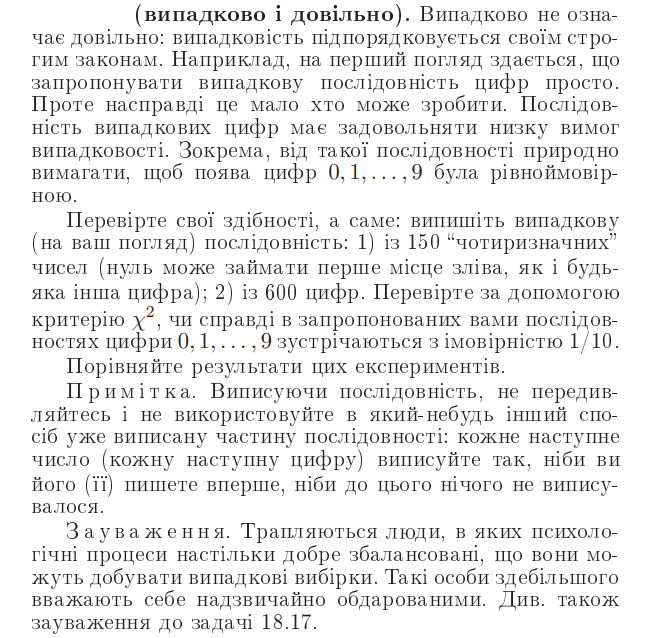

In [ ]:
table = PrettyTable()
table.field_names = ["цифри від 0 до 9"," кількість цифр від 0 до 9 в 150 'чотиризначних' числах", "кількість цифр від 0 до 9 в 600 числах"]
table.add_row([0,3,40])
table.add_row([1,3,35])
table.add_row([2,10,52])
table.add_row([3,8,26])
table.add_row([4,4,17])
table.add_row([5,7,50])
table.add_row([6,9,62])
table.add_row([7,2,68])
table.add_row([8,1,49])
table.add_row([9,20,31])
table.add_row(["Інші числа",67,430])
table.add_row(["Всього",83,170])
table.add_row(["Загалом",150,600])




table.hrules = 1
table.vrules = 1

print(table)
print("Нульова гіпотеза заключається в тому, що числа від 0, ... , 9 зустрічаються в послідовностях з ймовірністю 1/10")
print("Створимо функцію яка буде рахувати частково гіпотетичний розподіл")
def sum_elem(numbers, np):
    result_sum = sum(( number - np)**2 for number in numbers)
    return result_sum
p=0.1
n=150
m=600
Criterion_CHI_square=16.92
print("Запишемо формулу гіпотетичного розподілу")
display(Math(r'D(\hat{F_{n}},G)=\sum_{i=1}^{r}\frac{(\vartheta_{i}-np_{i})^2 }{np_{i}}>\chi_{\alpha ,r-1} ^{2}'))
#1
print("Знайдено наші npi для гіпотетичого розподілу")
n_pi_1=n*p
print(n_pi_1)
XI_1=[3,3,10,8,4,7,9,2,1,20]
total_sum_1 = sum_elem(XI_1, n_pi_1)
print("Часткова сума гіпотетичного розподілу = ",total_sum_1)
deviation_value_1=total_sum_1/n_pi_1
print("Гіпотетичний розподіл для 150 'чотиризначних' чисел = ",deviation_value_1)

print("Випишемо значення для рівня значущості")
level_of_significance= f"\\chi^2_\\alpha ,r-1  = \\chi^2(0,05;9) = {Criterion_CHI_square:.2f}"

display(Math(level_of_significance))

print("Тепер зробимо преревірку що гіпотетичний розподіл менший за сталий критерій хі квадрат і виберемо відхиляти гіпотезу чи ні  ")

if deviation_value_1<Criterion_CHI_square:
  print( 'Гіпотеза H\u2080 не відхиляється ')
else:
  print("Гіпотеза H\u2080 відхиляється")


#2
print("Знайдено наші npi для гіпотетичого розподілу")
n_pi_2=m*p
print(n_pi_2)
XI_2=[35,52,26,17,50,62,68,49,31]
total_sum_2 = sum_elem(XI_2, n_pi_2)
print("Часткова сума гіпотетичного розподілу = ",total_sum_2)
deviation_value_2=total_sum_2/n_pi_2
print("Гіпотетичний розподіл для 600 чисел = ",deviation_value_2)
print("Випишемо значення для рівня значущості")
level_of_significance= f"\\chi^2_\\alpha ,r-1  = \\chi^2(0,05;9) = {Criterion_CHI_square:.2f}"

display(Math(level_of_significance))
print("Тепер зробимо преревірку що гіпотетичний розподіл менший за сталий критерій хі квадрат і виберемо відхиляти гіпотезу чи ні  ")

if deviation_value_2<Criterion_CHI_square:
  print( 'Гіпотеза H\u2080 не відхиляється ')
else:
  print("Гіпотеза H\u2080 відхиляється")

+------------------+---------------------------------------------------------+----------------------------------------+
| цифри від 0 до 9 |  кількість цифр від 0 до 9 в 150 'чотиризначних' числах | кількість цифр від 0 до 9 в 600 числах |
+------------------+---------------------------------------------------------+----------------------------------------+
|        0         |                            3                            |                   40                   |
+------------------+---------------------------------------------------------+----------------------------------------+
|        1         |                            3                            |                   35                   |
+------------------+---------------------------------------------------------+----------------------------------------+
|        2         |                            10                           |                   52                   |
+------------------+--------------------

<IPython.core.display.Math object>

Знайдено наші npi для гіпотетичого розподілу
15.0
Часткова сума гіпотетичного розподілу =  973.0
Гіпотетичний розподіл для 150 'чотиризначних' чисел =  64.86666666666666
Випишемо значення для рівня значущості


<IPython.core.display.Math object>

Тепер зробимо преревірку що гіпотетичний розподіл менший за сталий критерій хі квадрат і виберемо відхиляти гіпотезу чи ні  
Гіпотеза H₀ відхиляється
Знайдено наші npi для гіпотетичого розподілу
60.0
Часткова сума гіпотетичного розподілу =  4824.0
Гіпотетичний розподіл для 600 чисел =  80.4
Випишемо значення для рівня значущості


<IPython.core.display.Math object>

Тепер зробимо преревірку що гіпотетичний розподіл менший за сталий критерій хі квадрат і виберемо відхиляти гіпотезу чи ні  
Гіпотеза H₀ відхиляється


<a name='6'></a>
## Завдання 14. Непараметричні критерії: критерій Колмогорова, критерій Вілкоксона, критерій знаків

<a name='6-1'></a>
### Задача 19.10

Умова задачі
19.10 На відрізку
[0;1] навмання кидають точку і реєструють її координату $\xi$ , а потім підкидають симетричний гральний кубик і реєструють число $\eta$ випавших очок.
Проведіть описаний стохастичний експеримент 20 разів і розгляньте послідовність чисел
$$\zeta _{i}=\eta _{i}+\xi_{i}$$ i=1 , 2 , ... , 20.
Чи можна вважати, що числа $\zeta_{1},\zeta_{2},...,\zeta_{20}$ утворюють вибірку з рівномірного на проміжку [1;7] розподілення? Скористайтеся критерієм Колмогорова.
З яких міркувань висунуто гіпотезу про рівномірний на проміжку [1;7] розподіл випадкових величин $\zeta$?
Зауваження: Реалізувати (змоделювати) кидання точки на відрізку [0;1] можна, наприклад, за допомогою таблиці випадкових чисел.

In [ ]:
from sympy import symbols, Eq
from sympy.plotting import plot

table = PrettyTable()
table.field_names = ["Кидок", "Число очок ", "Координата ", "Сума числа очок і координати"]
table.add_row([1, 3, 0.1009, 3.1009])
table.add_row([2, 2, 0.7325, 2.7325])
table.add_row([3, 5, 0.3754, 5.3754])
table.add_row([4, 4, 0.2048, 4.2048])
table.add_row([5, 1, 0.0842, 1.0842])
table.add_row([6, 6, 0.2689, 6.2689])
table.add_row([7, 2, 0.9901, 2.9901])
table.add_row([8, 3, 0.9025, 3.9025])
table.add_row([9, 4, 0.1280, 4.1280])
table.add_row([10, 1, 0.7999,1.7999])
table.add_row([11, 5, 0.7562, 5.7562])
table.add_row([12, 3, 0.6489, 3.6489])
table.add_row([13, 6, 0.1964, 6.1964])
table.add_row([14, 2, 0.0937, 2.0937])
table.add_row([15, 4, 0.8015, 4.8015])
table.add_row([16, 1, 0.3467, 1.3467])
table.add_row([17, 6, 0.2480, 6.2480])
table.add_row([18, 5, 0.2320, 5.2320])
table.add_row([19, 2, 0.3831, 2.3831])
table.add_row([20, 3, 0.6403, 3.6403])

table.hrules = 1
table.vrules = 1

print(table)
print("Відносно невідомого розподілу F висувається гіпотеза H\u2080 : F - рівномірний на проміжку [1;7] розподіл")
Epsilon=0.2941
#
XI_i=[0.1009,0.7325,0.3754,0.2048,0.0842,0.2689,0.9901,0.9025,0.1280,0.7999,0.7562,0.6489,0.1964,0.0937,0.8015,0.3467,0.2480,0.2320,0.3831,0.6403]
XI_i_str = ', '.join(map(str, XI_i))
# Створимо рядок LaTeX
print("Координата ")
Coordinate  = f" \eta _i : [{XI_i_str}]"
display(Math(Coordinate))
#
ETA_i=[3,2,5,4,1,6,2,3,4,1,5,3,6,2,4,1,6,5,2,3]
ETA_i_str = ', '.join(map(str, ETA_i))
# Створимо рядок LaTeX
print("Число очок ")
Number_of_points  = f"\\xi _i : [{XI_i_str}]"
display(Math(Number_of_points))
#
ZETA_i=[round(a+b,3) for a, b in zip(XI_i, ETA_i)]
ZETA_i_str = ', '.join(map(str, ZETA_i))
# Створимо рядок LaTeX
print("Сума числа очок і координати")
Sum_of_points_coordinates  = f"\\zeta _i : [{ZETA_i_str}]"
display(Math(Sum_of_points_coordinates))
#
print("Відсортований за зростанням список із суми координат і числа очок")
ZETA_i.sort()
print(ZETA_i)
print("Реалізація емпіричної функції розподілу, побудованої за вибіркою")
display(Math(r'\hat{F_{20}}(\zeta _{k}^{*})'))
F_ZETA_i=[0 , 0.05,  0.1 , 0.15 , 0.2 , 0.25 , 0.3  ,0.35  ,0.4 ,0.45 , 0.5 , 0.55 , 0.6  ,0.65 , 0.7  ,0.75  ,0.8  ,0.85  ,0.9 , 0.95,  1]
print(F_ZETA_i)
#Знайдемо рівномірний на проміжку розподіл G
print("Знайдемо рівномірний на проміжку розподіл G")
display(Math(r'G(\zeta _{k}^{*})=\frac{\zeta _{k}^{*}-1}{6}'))
G_ZETA_i=[round((c-1)/6,3) for c in ZETA_i]
print(G_ZETA_i)

#Знайдемо абсолютну різницю між G_ZETA_i-F_ZETA_i
print("Знайдемо абсолютну різницю")
display(Math(r'G(\zeta _{k}^{*})-\hat{F_{20}}(\zeta _{k}^{*})'))

difference_G_F=[np.absolute(d-f) for d,f in zip(G_ZETA_i, F_ZETA_i)]
print(difference_G_F)

print("Знайдемо супремум абсолютної різниці")
display(Math(r'D(\hat{F_{20}}(\zeta _{k}^{*}),G(\zeta _{k}^{*}))=\underset{x}{sup}\left |G(\zeta _{k}^{*})-\hat{F_{20}}(\zeta _{k}^{*})  \right |'))

Supremum_diff_G_F=max(difference_G_F)
print("D =",Supremum_diff_G_F)


print("Випишемо значення для рівня значущості")
level_of_significance= f"\\varepsilon_\\alpha ;s = \\varepsilon(0,05;20) = {Epsilon:.5f}"

display(Math(level_of_significance))

print("Тепер зробимо преревірку що супремум менший за сталий рівень значущості і виберемо відхиляти гіпотезу чи ні  ")

#
if Supremum_diff_G_F<Epsilon:
  print( 'Гіпотеза H\u2080 не відхиляється ')
else:
  print("Гіпотеза H\u2080 відхиляється")


+-------+-------------+-------------+------------------------------+
| Кидок | Число очок  | Координата  | Сума числа очок і координати |
+-------+-------------+-------------+------------------------------+
|   1   |      3      |    0.1009   |            3.1009            |
+-------+-------------+-------------+------------------------------+
|   2   |      2      |    0.7325   |            2.7325            |
+-------+-------------+-------------+------------------------------+
|   3   |      5      |    0.3754   |            5.3754            |
+-------+-------------+-------------+------------------------------+
|   4   |      4      |    0.2048   |            4.2048            |
+-------+-------------+-------------+------------------------------+
|   5   |      1      |    0.0842   |            1.0842            |
+-------+-------------+-------------+------------------------------+
|   6   |      6      |    0.2689   |            6.2689            |
+-------+-------------+-----------

<IPython.core.display.Math object>

Число очок 


<IPython.core.display.Math object>

Сума числа очок і координати


<IPython.core.display.Math object>

Відсортований за зростанням список із суми координат і числа очок
[1.084, 1.347, 1.8, 2.094, 2.383, 2.732, 2.99, 3.101, 3.64, 3.649, 3.902, 4.128, 4.205, 4.801, 5.232, 5.375, 5.756, 6.196, 6.248, 6.269]
Реалізація емпіричної функції розподілу, побудованої за вибіркою


<IPython.core.display.Math object>

[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
Знайдемо рівномірний на проміжку розподіл G


<IPython.core.display.Math object>

[0.014, 0.058, 0.133, 0.182, 0.231, 0.289, 0.332, 0.35, 0.44, 0.442, 0.484, 0.521, 0.534, 0.634, 0.705, 0.729, 0.793, 0.866, 0.875, 0.878]
Знайдемо абсолютну різницю


<IPython.core.display.Math object>

[0.014, 0.008, 0.033, 0.032, 0.031, 0.03899999999999998, 0.03200000000000003, 0.0, 0.03999999999999998, 0.008000000000000007, 0.016000000000000014, 0.029000000000000026, 0.06599999999999995, 0.016000000000000014, 0.0050000000000000044, 0.02100000000000002, 0.007000000000000006, 0.016000000000000014, 0.025000000000000022, 0.07199999999999995]
Знайдемо супремум абсолютної різниці


<IPython.core.display.Math object>

D = 0.07199999999999995
Випишемо значення для рівня значущості


<IPython.core.display.Math object>

Тепер зробимо преревірку що супремум менший за сталий рівень значущості і виберемо відхиляти гіпотезу чи ні  
Гіпотеза H₀ не відхиляється 


<a name='6-2'></a>
### Задача 19.11

Умова задачі


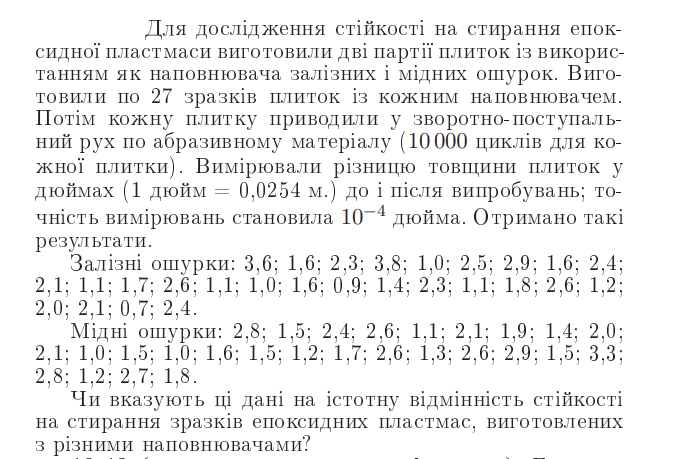

In [ ]:
from itertools import count
from collections import defaultdict
Z_Alpha=-1.96
n=27
m=27
print("Висуваємо нульову гіпотезу про відсутність істотної відмінності стійкості до стирання епоксидних пластмас і альтернативну до неї односторонню гіпотезу")
display(Math(r'H_{0}: \theta =0'))
display(Math(r' H_{1}:\theta >0'))
Iron_filings=[3.6, 1.6,2.3,3.8,1.0,2.5,2.9,1.6,2.4,2.1,1.1,1.7,2.6,1.1,1.0,1.6,0.9,1.4,2.3,1.1,1.8,2.6,1.2,2.0,2.1,0.7,2.4]
print("Виведемо наш перший список значень залізних лушпинь",Iron_filings)

Copper_filings=[2.8,1.5,2.4,2.6,1.1,2.1,1.9,1.4,2.0,2.1,1.0,1.5,1.0,1.6,1.5,1.2,1.7,2.6,1.3,2.6,2.9,1.5,3.3,2.8,1.2,2.7,1.8]
print("Виведемо наш другий список значень мідних лушпинь",Copper_filings)

Iron_filings.sort()
print("Відсортуємо  наш перший список значень залізних лушпинь",Iron_filings)

Copper_filings.sort()
print("Відсортуємо наш другий список значень мідних лушпинь",Copper_filings)

marked_Iron_filings = [(item, "A") for item in Iron_filings]
# Робимо відмітки на єлементах з другого списку
marked_Copper_filings = [(item, "B") for item in Copper_filings]

Combined_Sorted_Iron_Copper_filings=sorted(marked_Iron_filings+marked_Copper_filings)


Positions_Iron_filings = {number: [] for number in marked_Iron_filings}

# Наповнення словника індексами
for index, item in enumerate(Combined_Sorted_Iron_Copper_filings):
    if item in marked_Iron_filings:
        Positions_Iron_filings[item].append(index+1)

# Обчислення суми позицій для кожного номера в Positions_Iron_filings
Sum_Positions_Iron_filings = {number: sum(positions) for number, positions in Positions_Iron_filings.items()}

print("Відсортований загальний список =", Combined_Sorted_Iron_Copper_filings)
print("Ранги чисел з першого списку =", Positions_Iron_filings)
print("Сума рангів для кожного числа з першого списку =", Sum_Positions_Iron_filings)

#
Counter_Combined_Sorted_Iron_Copper_filings=Counter(marked_Iron_filings)
Sorted_Counter_Combined_Iron_Copper_filings = sorted(Counter_Combined_Sorted_Iron_Copper_filings.items(), key=lambda x: x[0])
print("Кілкість чисел Зі списка А в загальному списку",Sorted_Counter_Combined_Iron_Copper_filings)

# Сума рангів першого списку
print("Виконємо критерій Вілкоксона - де W  це сума рангів меншої вибірки")
Counts_Iron_filings = {item: count for item, count in Sorted_Counter_Combined_Iron_Copper_filings}
W={number: Sum_Positions_Iron_filings[number] / Counts_Iron_filings[number] for number in Sum_Positions_Iron_filings}
print("Сума рангів першої вибірки А =",sum(W.values()))
print("Знайдемо помилку першого роду")
display(Math(r'W_{\alpha ;n,m}=\frac{1}{2}*n(n+m+1)-z_{\alpha }\sqrt{\frac{1}{12}*mn(n+m+1)}'))
W_alpha_54=(1/2)*n*(n+m+1)+Z_Alpha*np.sqrt((1/12)*n*m*(n+m+1))
print("Помилка першого роду =",W_alpha_54)
print("Знайдемо помилку другого роду")
display(Math(r'n(n+m+1)-W_{\alpha ;n,m}'))
error_of_the_second_kind=n*(n+m+1)-W_alpha_54
print("Помилка другого роду =",round(error_of_the_second_kind,1))
print("Тепер зробимо преревірку що сума рангів W менша за помилку другого роду і більша за помилку першого роду і виберемо відхиляти гіпотезу чи ні ")
if round(error_of_the_second_kind,1)>sum(W.values())>W_alpha_54:
  print("Гіпотезу H\u2080 не відхиляємо")
else:
  print("Гіпотезу H\u2080 відхиляємо")



Висуваємо нульову гіпотезу про відсутність істотної відмінності стійкості до стирання епоксидних пластмас і альтернативну до неї односторонню гіпотезу


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Виведемо наш перший список значень залізних лушпинь [3.6, 1.6, 2.3, 3.8, 1.0, 2.5, 2.9, 1.6, 2.4, 2.1, 1.1, 1.7, 2.6, 1.1, 1.0, 1.6, 0.9, 1.4, 2.3, 1.1, 1.8, 2.6, 1.2, 2.0, 2.1, 0.7, 2.4]
Виведемо наш другий список значень мідних лушпинь [2.8, 1.5, 2.4, 2.6, 1.1, 2.1, 1.9, 1.4, 2.0, 2.1, 1.0, 1.5, 1.0, 1.6, 1.5, 1.2, 1.7, 2.6, 1.3, 2.6, 2.9, 1.5, 3.3, 2.8, 1.2, 2.7, 1.8]
Відсортуємо  наш перший список значень залізних лушпинь [0.7, 0.9, 1.0, 1.0, 1.1, 1.1, 1.1, 1.2, 1.4, 1.6, 1.6, 1.6, 1.7, 1.8, 2.0, 2.1, 2.1, 2.3, 2.3, 2.4, 2.4, 2.5, 2.6, 2.6, 2.9, 3.6, 3.8]
Відсортуємо наш другий список значень мідних лушпинь [1.0, 1.0, 1.1, 1.2, 1.2, 1.3, 1.4, 1.5, 1.5, 1.5, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.1, 2.4, 2.6, 2.6, 2.6, 2.7, 2.8, 2.8, 2.9, 3.3]
Відсортований загальний список = [(0.7, 'A'), (0.9, 'A'), (1.0, 'A'), (1.0, 'A'), (1.0, 'B'), (1.0, 'B'), (1.1, 'A'), (1.1, 'A'), (1.1, 'A'), (1.1, 'B'), (1.2, 'A'), (1.2, 'B'), (1.2, 'B'), (1.3, 'B'), (1.4, 'A'), (1.4, 'B'), (1.5, 'B'), (1.5, '

<IPython.core.display.Math object>

Помилка першого роду = 629.2050486561735
Знайдемо помилку другого роду


<IPython.core.display.Math object>

Помилка другого роду = 855.8
Тепер зробимо преревірку що сума рангів W менша за помилку другого роду і більша за помилку першого роду і виберемо відхиляти гіпотезу чи ні 
Гіпотезу H₀ відхиляємо


<a name='6-3'></a>
### Задача 19.12
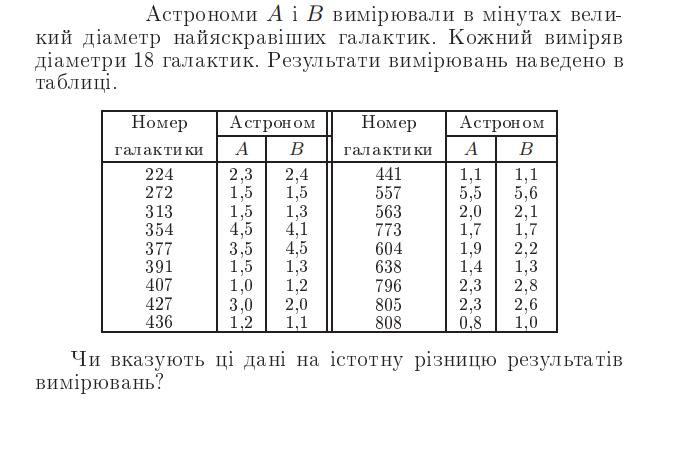

In [ ]:
df = pd.DataFrame(
{"A" : [2.3,1.5,1.5,4.5,3.5,1.5,1.0,3.0,1.2,1.1,5.5,2.0,1.7,1.9,1.4,2.3,2.3,0.8],
"B" : [2.4,1.5,1.3,4.1,4.5,1.3,1.2,2.0,1.1,1.1,5.6,2.1,1.7,2.2,1.3,2.8,2.6,1.0],},
index = [224,272,313,354,377,391,407,427,436,441,557,563,773,604,638,796,805,808])
df.index.name = 'gal num'
print(df)
#
print("Природно припустити що випадкові величини пов'язані співвідношенням ")
display(Math(r'\zeta _{i}=\eta _{i}-\xi_{i}'))
print("Висувається гіпотеза H\u2080")
display(Math(r'H_{0}:\theta = 0'))
print("І альтернативна до гіпотези H\u2080 гіпотеза")
display(Math(r'H_{0}:\theta > 0'))

m=11
A=[2.3,1.5,1.5,4.5,3.5,1.5,1.0,3.0,1.2,1.1,5.5,2.0,1.7,1.9,1.4,2.3,2.3,0.8]
print("Виміри астронома А",A)
B=[2.4,1.5,1.3,4.1,4.5,1.3,1.2,2.0,1.1,1.1,5.6,2.1,1.7,2.2,1.3,2.8,2.6,1.0]
print("Виміри астронома В",B)

print("Скористаємося критерієм знаків за наявності звязків")
ETA=[a-b for a, b in zip(A, B)]
print("Отримані значення різниць = ",ETA)
filtered_ETA = [res for res in ETA if res > 0]
print("Відмінні від нуля і додатні різниці = ",filtered_ETA)
quantity_ETA=len(filtered_ETA)
print("Кількість відмінних  від нуля додатних  різниць = ",quantity_ETA)

print("Випишемо значення для рівня значущості")
level_of_significance= f"m_\\alpha ;s = m(0,025;15) = {m:.0f}"

display(Math(level_of_significance))

print("Тепер зробимо преревірку що відмінна від нуля додатна різниця менша за сталий рівень значущості і виберемо відхиляти гіпотезу чи ні ")
if quantity_ETA<m:
  print( 'Гіпотеза H\u2080 не відхиляється ')
else:
  print("Гіпотеза H\u2080 відхиляється")

           A    B
gal num          
224      2.3  2.4
272      1.5  1.5
313      1.5  1.3
354      4.5  4.1
377      3.5  4.5
391      1.5  1.3
407      1.0  1.2
427      3.0  2.0
436      1.2  1.1
441      1.1  1.1
557      5.5  5.6
563      2.0  2.1
773      1.7  1.7
604      1.9  2.2
638      1.4  1.3
796      2.3  2.8
805      2.3  2.6
808      0.8  1.0
Природно припустити що випадкові величини пов'язані співвідношенням 


<IPython.core.display.Math object>

Висувається гіпотеза H₀


<IPython.core.display.Math object>

І альтернативна до гіпотези H₀ гіпотеза


<IPython.core.display.Math object>

Виміри астронома А [2.3, 1.5, 1.5, 4.5, 3.5, 1.5, 1.0, 3.0, 1.2, 1.1, 5.5, 2.0, 1.7, 1.9, 1.4, 2.3, 2.3, 0.8]
Виміри астронома В [2.4, 1.5, 1.3, 4.1, 4.5, 1.3, 1.2, 2.0, 1.1, 1.1, 5.6, 2.1, 1.7, 2.2, 1.3, 2.8, 2.6, 1.0]
Скористаємося критерієм знаків за наявності звязків
Отримані значення різниць =  [-0.10000000000000009, 0.0, 0.19999999999999996, 0.40000000000000036, -1.0, 0.19999999999999996, -0.19999999999999996, 1.0, 0.09999999999999987, 0.0, -0.09999999999999964, -0.10000000000000009, 0.0, -0.30000000000000027, 0.09999999999999987, -0.5, -0.30000000000000027, -0.19999999999999996]
Відмінні від нуля і додатні різниці =  [0.19999999999999996, 0.40000000000000036, 0.19999999999999996, 1.0, 0.09999999999999987, 0.09999999999999987]
Кількість відмінних  від нуля додатних  різниць =  6
Випишемо значення для рівня значущості


<IPython.core.display.Math object>

Тепер зробимо преревірку що відмінна від нуля додатна різниця менша за сталий рівень значущості і виберемо відхиляти гіпотезу чи ні 
Гіпотеза H₀ не відхиляється 
